# **Hands-On Machine Learning Workshop:**
Hello and welcome to this exciting journey into the world of Machine Learning! This Google Colab notebook will serve as **our workspace** as we explore the fascinating concepts and techniques that make up Machine Learning.

This workshop is designed to provide a balanced mix of theory and hands-on practice. We will start by discussing the fundamental differences between traditional programming and Machine Learning, introducing you to the core ideas that make ML a game-changing technology. We'll then dive into practical exercises with Python and real-world datasets to cement your understanding.

Remember, the goal here **is not just to learn how to write code**, but to understand the intuitions and principles that underpin Machine Learning. So, ask questions, experiment with the code, and most importantly, have fun learning!

Now, let's embark with me your host Azzedine on this adventure and unravel the magic of Machine Learning together!



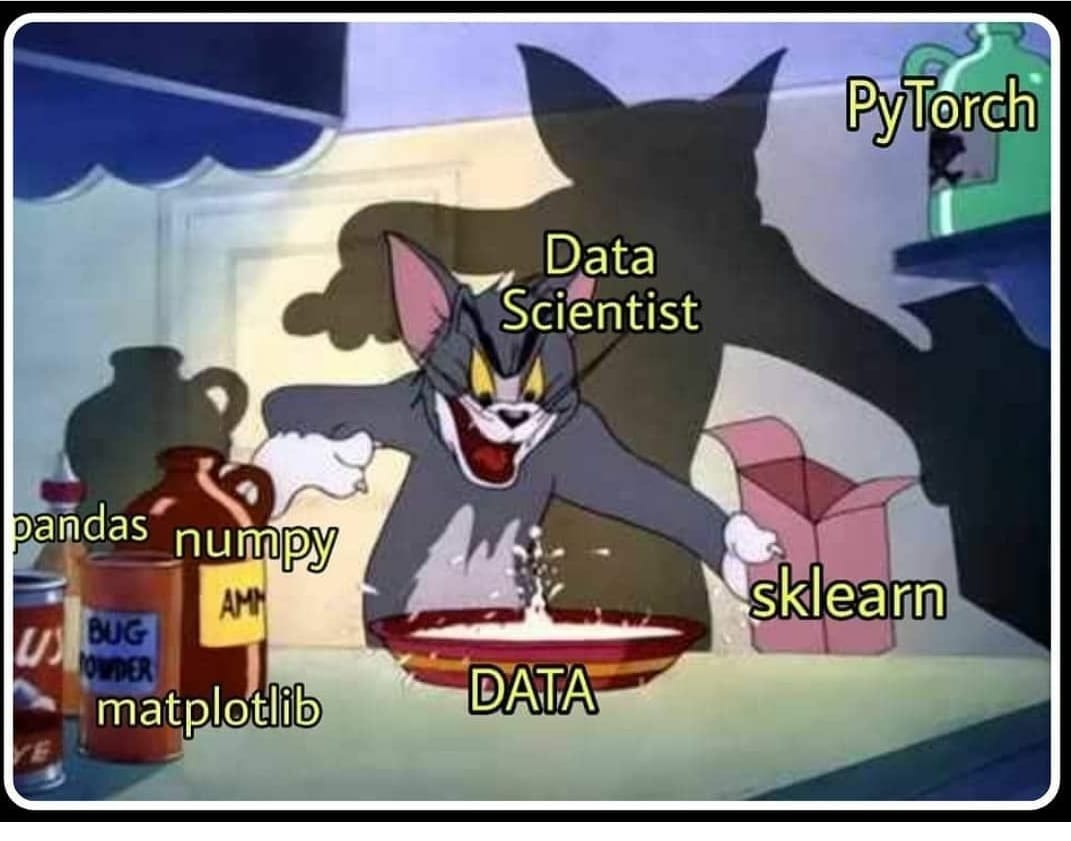

---------------------------------------

## Overview of Machine Learning
Like we said in the presentation, not everything will be solved using Machine Learning, there will be always traditional approaches to tackle problems such as scraping emails from VIC ENP Official Website:

In [ ]:
#Run this cell to start the python kernel
print("Hello World !")

Hello World !


In [ ]:
import requests
from bs4 import BeautifulSoup
import re

def find_emails(s):

    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

    matches = re.findall(email_pattern, s)

    return matches



In [ ]:
url = 'https://www.enp.edu.dz/en/scientific-clubs/vision-innovation-club/'


response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

text = soup.get_text()
emails = find_emails(text)

print(emails)

['malika.bouzertit@g.enp.edu.dz', 'enp@g.enp.edu.dz']


In the previous example we have used the famous python package `BeautifulSoup` to render the web page as plain html format and searched for the emails in it using the Regex defined in the function `find_emails`

A lot of other common problems such as applying a filter or detecting edges on an image can be done using simple traditional approaches:

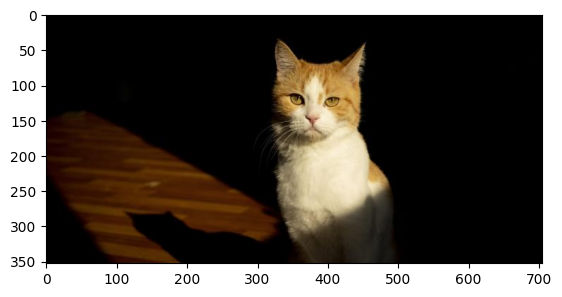

In [ ]:
import cv2 #Opencv
import matplotlib.pyplot as plt
import numpy as np
import requests

url = 'https://s.yimg.com/ny/api/res/1.2/Ly1I.cjBebLlwTswe5fMVw--/YXBwaWQ9aGlnaGxhbmRlcjt3PTcwNTtoPTM1Mw--/https://media.zenfs.com/en/business_insider_articles_888/d6bf57b7863f942d517aa217463591b1'

response = requests.get(url, stream=True).raw

arr = np.asarray(bytearray(response.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)  # 'Load it as it is'

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()




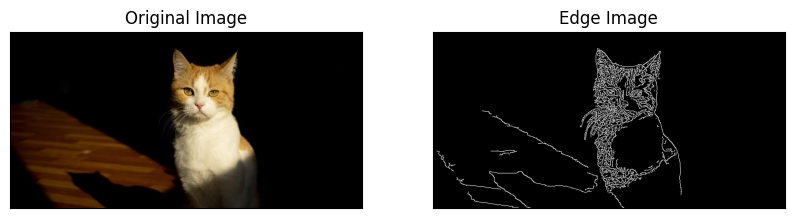

In [ ]:

# Perform Canny edge detection
edges = cv2.Canny(img, threshold1=30, threshold2=100)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

------------------------------

### How to build a model that predicts if a patient will get diabetes:
Now we are talking ! We will build step by step a model that can predict whether a patient will have diabetes or not based on previous data and some common features such as Blood Pressure and many others ! As wizardly as it seems to be: this is just basic Mathematics and you will feel it when we break down the code:

In [ ]:
# Import required libraries
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Remember

> With ***Pandas*** you can do a lot of data manipulations in a fast and easy way.

> Scikit-Learn is your magical tool box in Machine Learning !



In [ ]:
# Load the dataset

diabetes = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

print(diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

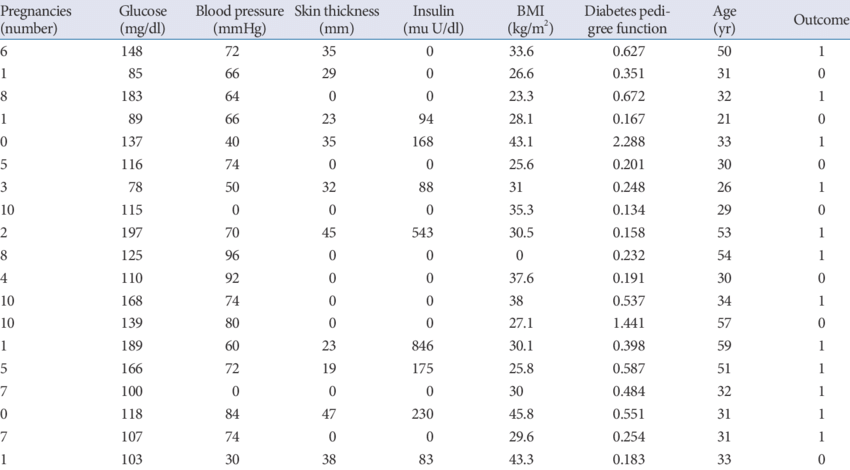

In [ ]:
# we store in y our target feature and in X all the other features.
X = diabetes.drop('Outcome', axis=1) #The feature that help us predict
y = diabetes['Outcome'] #The feature we want to predict
print(X, y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


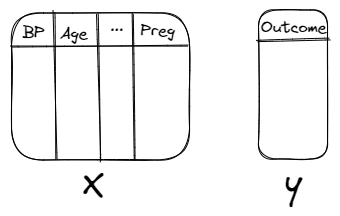

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train, y_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
381            0      105             68             22        0  20.0   
62             5       44             62              0        0  25.0   
423            2      115             64             22        0  30.8   
216            5      109             62             41      129  35.8   
735            4       95             60             32        0  35.4   
..           ...      ...            ...            ...      ...   ...   
54             7      150             66             42      342  34.7   
197            3      107             62             13       48  22.9   
720            4       83             86             19        0  29.3   
494            3       80              0              0        0   0.0   
623            0       94             70             27      115  43.5   

     DiabetesPedigreeFunction  Age  
381                     0.236   22  
62                      0.587   36  


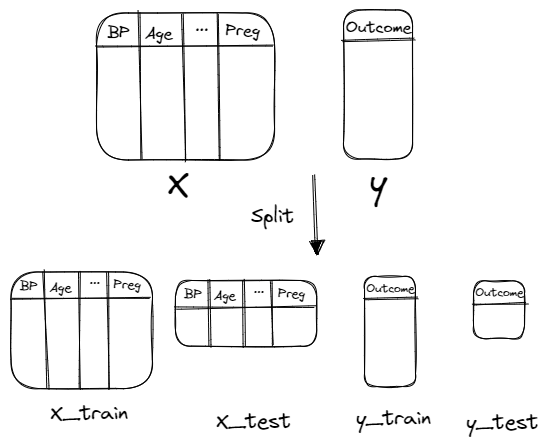

In [ ]:
print('X:',len(X),len(X_train), len(X_test))
print('y:', len(y), len(y_train), len(y_test))

X: 768 614 154
y: 768 614 154


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

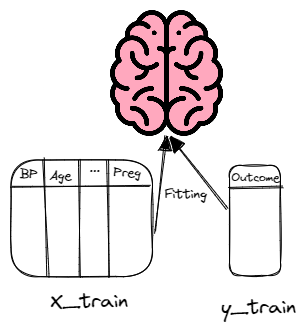

In [ ]:
y_pred = model.predict(X_test)
y_pred = [0 if y < 0.5 else 1 for y in y_pred]
y_pred = pd.DataFrame(y_pred)
print(y_pred)

     0
0    0
1    0
2    0
3    1
4    0
..  ..
149  0
150  0
151  0
152  0
153  1

[154 rows x 1 columns]


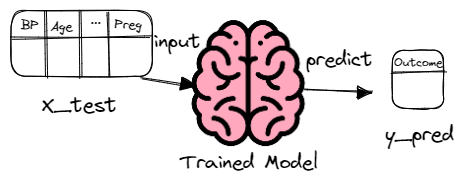

In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

Mean Squared Error:  0.24025974025974026


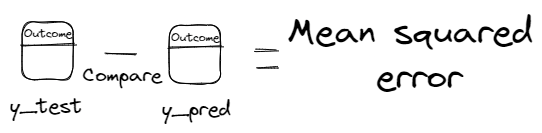

After assuming our model is good, we will make predictions confidently about any person in the dataset:


In [ ]:
print(X_test.iloc[75])

Pregnancies                   7.000
Glucose                     105.000
BloodPressure                 0.000
SkinThickness                 0.000
Insulin                       0.000
BMI                           0.000
DiabetesPedigreeFunction      0.305
Age                          24.000
Name: 49, dtype: float64


In [ ]:
prediction = model.predict([X_test.iloc[75]])
print('We will predict the outcome of the following patients:', X_test.iloc[75])
print('predictions:',prediction)
print('the real outcome is:', y_test.iloc[75])

We will predict the outcome of the following patients: Pregnancies                   7.000
Glucose                     105.000
BloodPressure                 0.000
SkinThickness                 0.000
Insulin                       0.000
BMI                           0.000
DiabetesPedigreeFunction      0.305
Age                          24.000
Name: 49, dtype: float64
predictions: [0.0604636]
the real outcome is: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Summary:
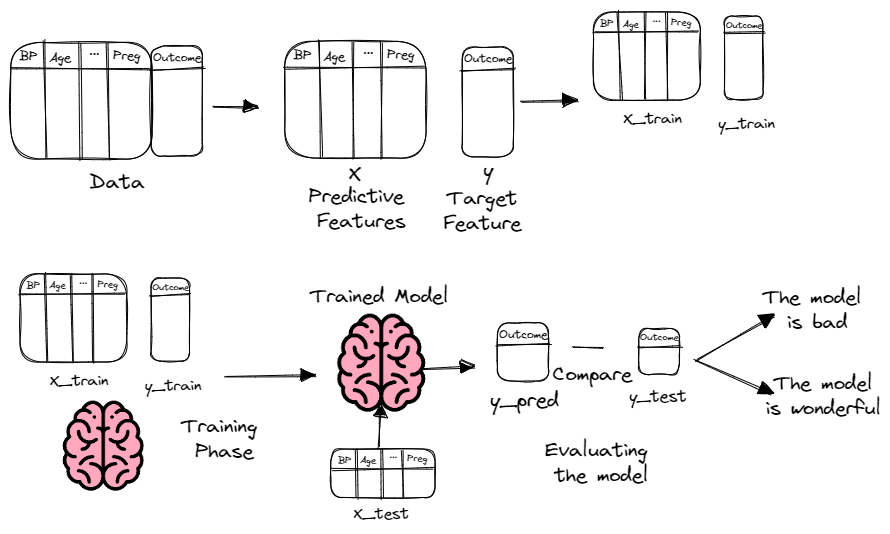


In [ ]:
# Import required libraries
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")



# Create feature matrix X and target vector y
X = diabetes.drop('Outcome', axis=1) #The feature that help us predict
y = diabetes['Outcome'] #The feature we want to predict

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the LinearRegressor
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target for the test data
y_pred = model.predict(X_test)  # Fill in the blank with the correct argument

# Calculate and print the mean squared error of the predictions
mse = mean_squared_error(y_pred, y_test)  # Fill in the blanks with the correct arguments
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.15453326017121802


### Your turn:
Now we will do the same thing as before but with a different algorithm, now we will use the `DecisionTreeClassifier` found in the `sklearn.tree` package, import it correctly and fill the blanks here with the correct code snippets:


In [ ]:
# Import necessary libraries
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import _________  # Fill in the blank with the correct import
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
___________ = ____________



# Create feature matrix X and target vector y
X = ____________
y = ____________

# Split data into training and test sets
X_train, _____, y_train, ____ = ______(X, y, test_size=0.2, random_state=42)

# Instantiate the DecisionTreeRegressor
model = _________(random_state=42)  # Fill in the blank with the correct class

# Fit the model to the training data
model._______(_______, _______)  # Fill in the blanks with the correct arguments

# Predict the target for the test data
y_pred = model._______(_______)  # Fill in the blank with the correct argument

# Calculate and print the mean squared error of the predictions
mse = mean_squared_error(_______, _______)  # Fill in the blanks with the correct arguments
print(f"Mean Squared Error: {mse}")


-----------------------------------

## Unsupervised Learning:

Unlike supervised learning, unsupervised learning algorithms are given no labels or target outputs, just the input data. The goal of unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data itself. These algorithms are used for clustering, dimensionality reduction, association rules, and visualization. Common examples include k-means clustering, hierarchical clustering, Principal Component Analysis (PCA), and autoencoders.

In this section of the notebook we will try to illustrate a case of (unsupervised) clustering using k-means on the iris dataset. It contains measurements of iris flowers and our aim is to cluster (regroup) them into different groups (subspecies of iris) according to features:  
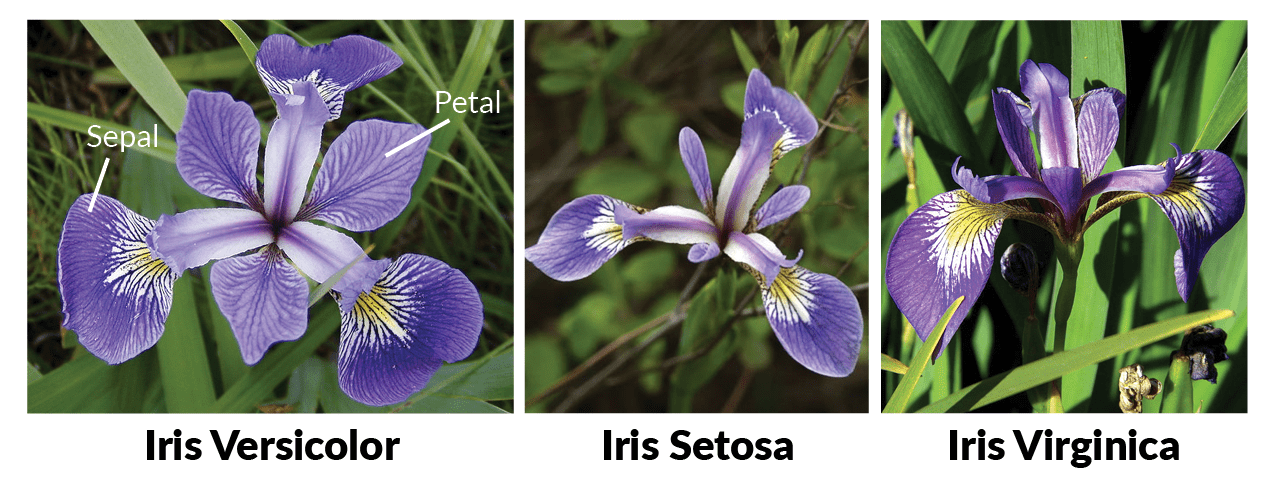

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


# Load the iris dataset
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris = iris.drop('sepal length (cm)', axis=1)

In [ ]:
print(iris)

     sepal width (cm)  petal length (cm)  petal width (cm)
0                 3.5                1.4               0.2
1                 3.0                1.4               0.2
2                 3.2                1.3               0.2
3                 3.1                1.5               0.2
4                 3.6                1.4               0.2
..                ...                ...               ...
145               3.0                5.2               2.3
146               2.5                5.0               1.9
147               3.0                5.2               2.0
148               3.4                5.4               2.3
149               3.0                5.1               1.8

[150 rows x 3 columns]


Now, Let's do some plotting !

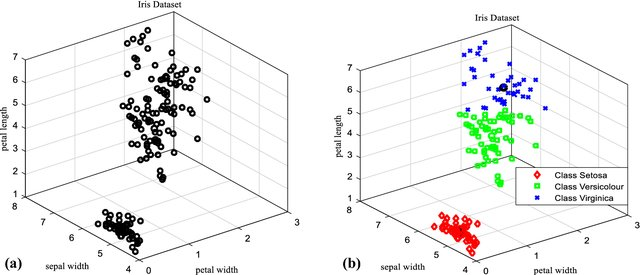

Plotting in 3D was always hard to understand and to manipulate, look at this cloud of birds: It's in a 3D space but captured in a 2D plain picture. That's why its easier to assimilate it and view the distances between each bird.
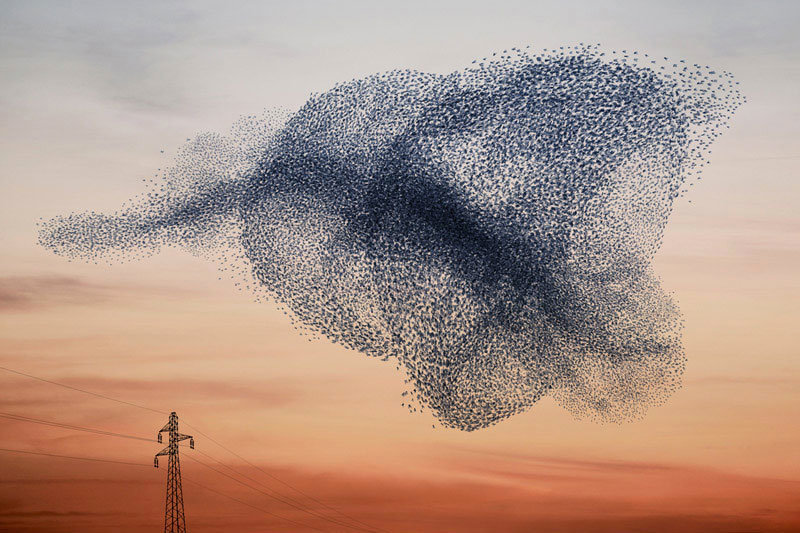

In fact so we can have a full representation of the distances between birds we need to plot 3 plots of each dimensions alone, so we can be 100% sure of those distances, one 2D plot is not sufficient.

That's what we will do to the iris Dataset.

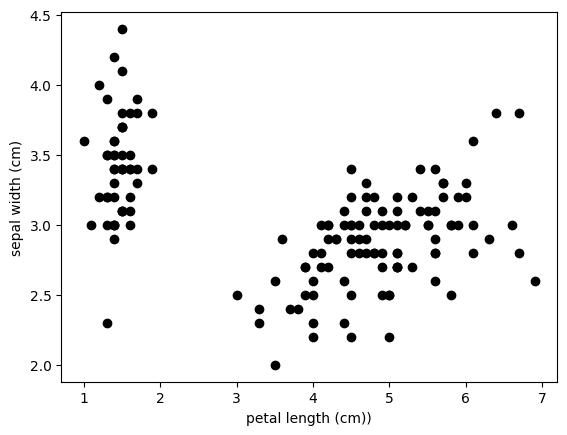

In [ ]:
plt.scatter(iris["petal length (cm)"], iris["sepal width (cm)"], c="black")
plt.xlabel("petal length (cm))")
plt.ylabel("sepal width (cm)")
plt.show()

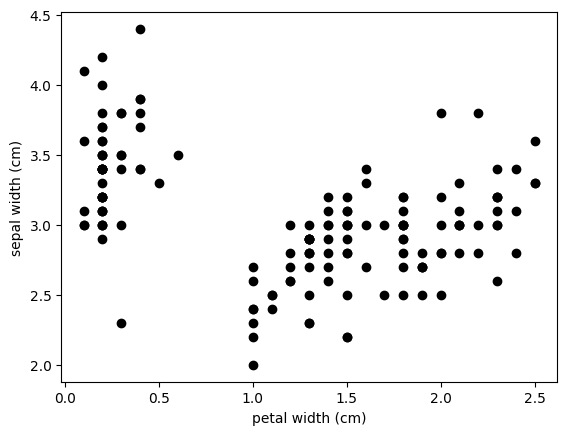

In [ ]:
plt.scatter(iris["petal width (cm)"], iris["sepal width (cm)"], c="black")
plt.xlabel("petal width (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

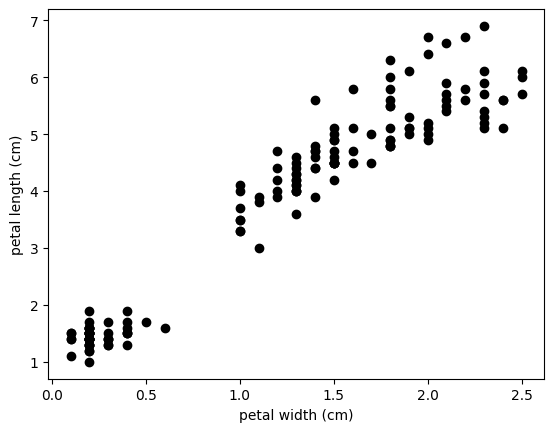

In [ ]:
plt.scatter(iris["petal width (cm)"], iris["petal length (cm)"], c="black")
plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")
plt.show()

The data we have until now:


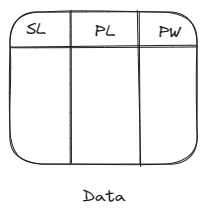

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(iris)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

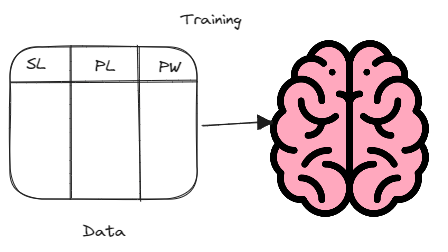

In [ ]:
predicted_labels = kmeans.predict(iris)

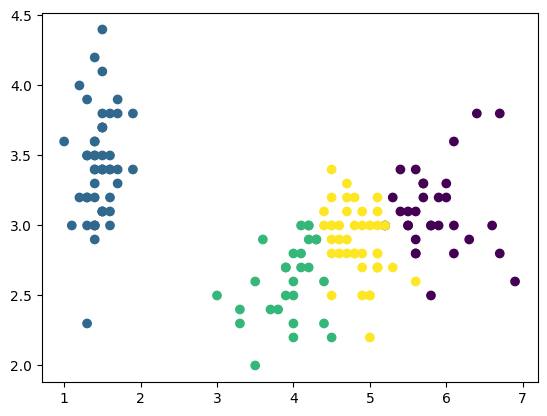

In [ ]:
plt.scatter(iris["petal length (cm)"], iris["sepal width (cm)"], c=predicted_labels, cmap='viridis')
plt.show()

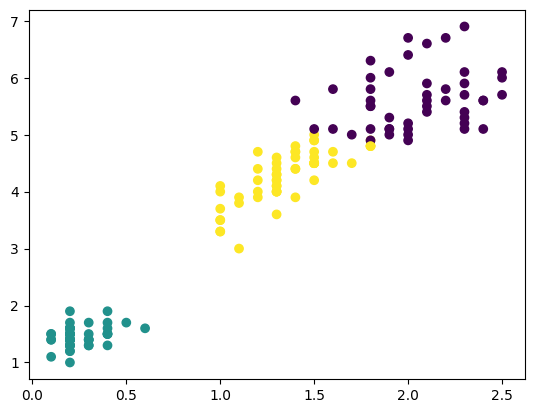

In [ ]:
plt.scatter(iris["petal width (cm)"], iris["petal length (cm)"], c=predicted_labels, cmap='viridis')
plt.show()

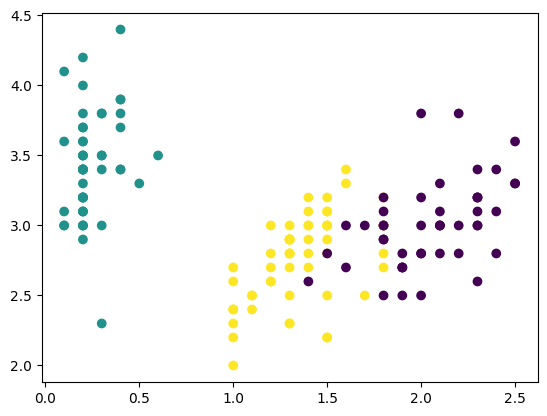

In [ ]:
plt.scatter(iris["petal width (cm)"], iris["sepal width (cm)"], c=predicted_labels, cmap='viridis')
plt.show()

-----------------------------------

### Your Turn:
Cluster the wine bottles according to their Alcohol rate and Malic acid rate using the Algorithm DBSCAN. Change the parameters until you get something coherent, but start with the parameters given in the comments.

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import DBSCAN

# Load the wine dataset
wine = load_wine()

# Use only two features: Alcohol and Malic acid
X = wine.data[:, :2]

# Create a DBSCAN instance with eps=0.3 and min_samples=5
# YOUR TASK: Fill in the blanks to create a DBSCAN instance
dbscan = DBSCAN(eps=_____, min_samples=_____)

# Fit the model to the data
# YOUR TASK: Fill in the blank to fit the model to the data
dbscan.fit(______)

# Get the cluster labels for the data
# YOUR TASK: Fill in the blank to get the labels
labels = dbscan.labels_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

plt.show()


-------------------------

## A small peek into Reinforcement Learning:


In [ ]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import gym
import time

# Create a simple gridworld with no obstacles
env = gym.make("FrozenLake-v1", is_slippery=False)

# Initialize Q-table with zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
alpha = 0.5
gamma = 0.95
num_episodes = 5000

for i_episode in range(num_episodes):
    # Reset the state for the start of the episode
    state = env.reset()

    for t in range(100):
        # Choose action from Q-table (with some randomness for exploration)
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n)*(1./(i_episode+1)))

        # Take the action and get the reward and new state
        next_state, reward, done, info = env.step(action)

        # Update the Q-table
        Q[state, action] = Q[state, action] + alpha*(reward + gamma*np.max(Q[next_state, :]) - Q[state, action])

        state = next_state

        if done:
            break

# Now let's print the final Q-table
print("Final Q-Table Values:")
print(Q)

# Let's also print out the policy that the agent has learned
print("\n\nFinal Policy:")
print(np.argmax(Q, axis=1).reshape((4, 4)))

Final Q-Table Values:
[[0.         0.77378094 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81450625 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.857375   0.        ]
 [0.         0.9025     0.         0.        ]
 [0.         0.35625    0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.95       0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


Final Policy:
[[1 0 0 0]
 [1 0 0 0]
 [2 1 1 0]
 [0 2 2 0]]


-----------------------------


## Building Powerful Models !
Each model is specific to a specific problem and is used for a specific dataset. But there is a certain Model that can perform good in every case ! (It's not a very accurate assemption but we take it for instance): XGboost !

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
cancer = load_breast_cancer()

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109)

# Create a XGBoost classifier object
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train XGBoost Classifier
xgb_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = xgb_clf.predict(X_test)

# Model Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.9766081871345029


In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
lin_reg = LinearRegression()

# Train the model using the training sets
lin_reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lin = lin_reg.predict(X_test)
y_pred_lin = [1 if i > 0.5 else 0 for i in y_pred_lin] #threshold to make it binary

# Model Accuracy
print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_lin))


Linear Regression Accuracy: 0.9824561403508771


In fact we observe that the simple and "bad" Linear Regressor has a better accuracy than the XGboost Classifier. This emphasizes the concept of randomness in models performance ! Each model can do well on a certain type of Data and perform poorly in another types. Everything depends on the Data !

## Problems and Troubles !
Doing AI Magic is not always that easy, and involves more processes than you think. Especially when dealing with raw data: usually, it doesn't come ready to get used by the model, but we process it and clean it so it can be fit to our models.

In this section you will get to process unclean data and make it ready to use !



### Missing Values:

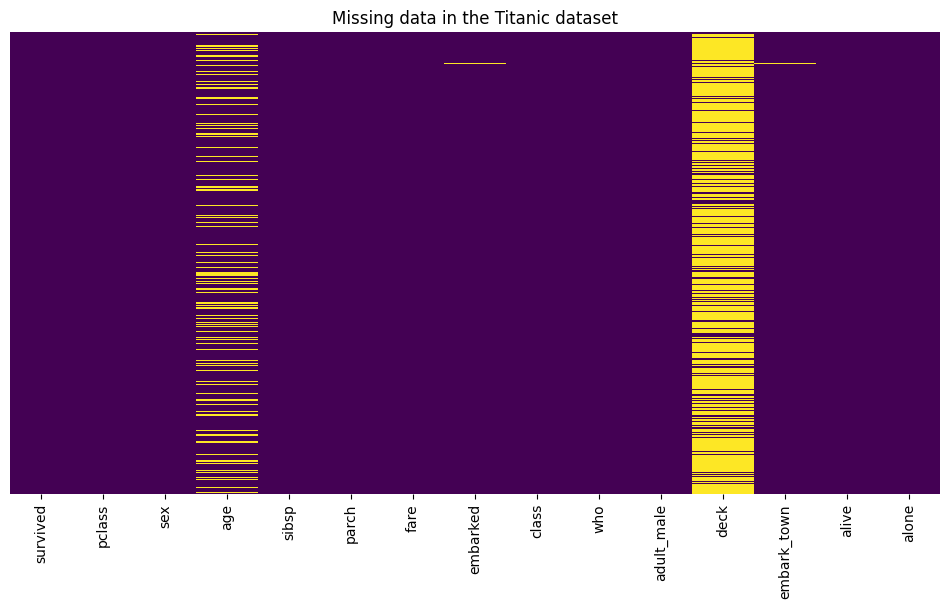

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = sns.load_dataset('titanic')

# Plot data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing data in the Titanic dataset')
plt.show()



In [ ]:

# Try fitting a model without handling missing data
X = df[['pclass', 'age', 'fare']]
y = df['survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
model = LogisticRegression(solver='liblinear')

try:
    model.fit(X_train, y_train)
except Exception as e:
    print(f"Error: {e}")


Error: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


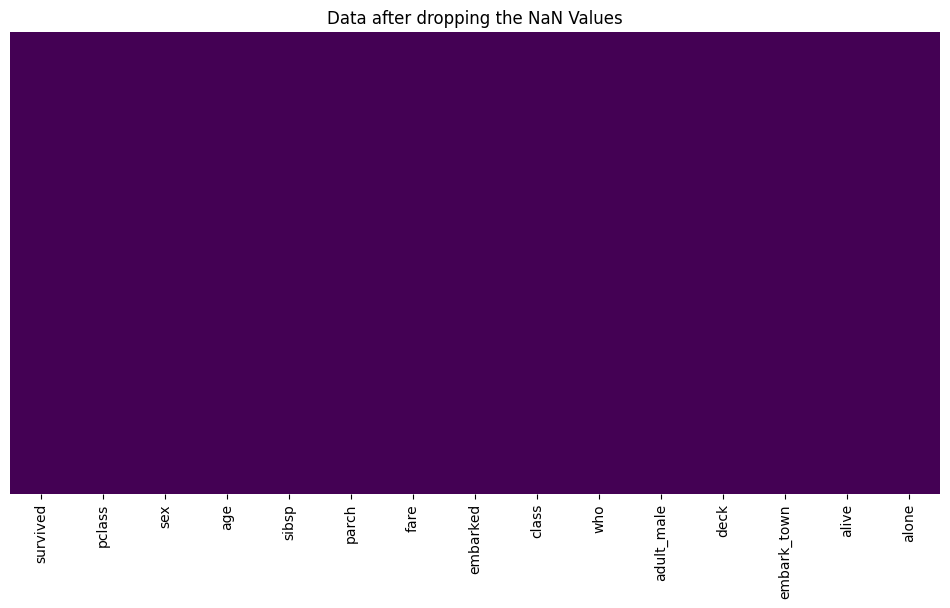

In [ ]:

# Now, let's drop missing values
df = df.dropna()
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Data after dropping the NaN Values')
plt.show()



In [ ]:
# Update X and y
X = df[['pclass', 'age', 'fare']]
y = df['survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
try:
    model.fit(X_train, y_train)
    print("Model successfully trained!")
except Exception as e:
    print(f"Error: {e}")

Model successfully trained!


In [ ]:
df = df.fillna(df.mean()) #In order to not decrease the amount of data we replace the NaN values with the mean of their columns


### Dealing with Outliers


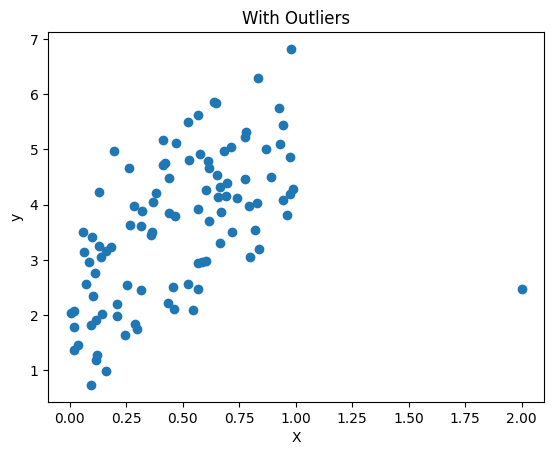

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create synthetic data with an outlier
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.randn(100, 1)
X[0, 0] = 2 # Introducing an outlier

#plot the data
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("With Outliers")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the model with data that have outliers
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with outliers: {mse}")

Mean Squared Error with outliers: 2.4417433214128934


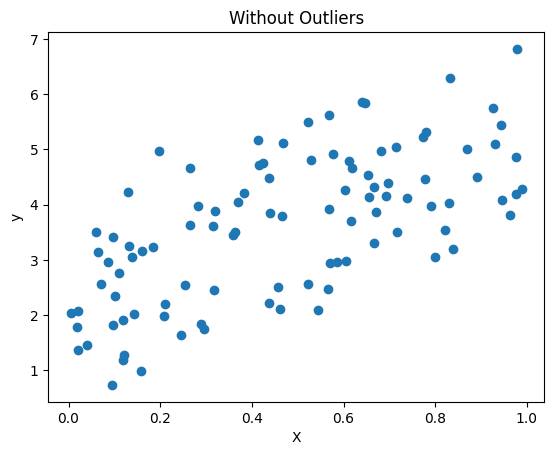

In [ ]:
# Removing the outlier
X = X[1:]
y = y[1:]
#plot the data
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Without Outliers")
plt.show()

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error without outliers: {mse}")

Mean Squared Error without outliers: 0.7688655210449925


### Bias and Variance

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Generate 2d classification dataset
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Overfitting model
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
print(f"Overfitted model accuracy: {accuracy_score(y_test, y_pred)}")



Overfitted model accuracy: 0.824


In [ ]:

# Reducing overfitting with cross-validation
scores = cross_val_score(tree_clf, X_train, y_train, cv=10)
print(f"Cross-validated model accuracy: {np.mean(scores)}")



Cross-validated model accuracy: 0.8533428165007113


In [ ]:
# Reducing overfitting with Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print(f"Random Forest model accuracy: {accuracy_score(y_test, y_pred_rf)}")

Random Forest model accuracy: 0.896
